Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# GMT 456 - Distance Between Four Selected Buildings 

The aim of this assignment is to utilise open source tools and data to investigate the quality of OSM building footprint data.

**Data**: [Landcover, version 1](https://landcover.ai/) 

**Steps**:
1. Download the data, and use the associated mask file (N-34-97-C-b-1-2.tif) to obtain the vector of building footprints. Note the SRID of the project is **2180**.
2. Investigate the study area, the structure of buildings from the RGB image.
3 (optional). Download the OSM building data for the same study area. Investigate the [QuickOSM](https://plugins.qgis.org/plugins/QuickOSM/) plugin. 
4. Install the [x2Polygons](https://pypi.org/project/x2polygons/) package.
5. Read the [documentation](https://x2polygons.readthedocs.io/en/latest/) and understand how to compute the Hausdorff distance.
6. **Digitise the buildings that has a point-of-interest (POI)**. Save the layer under the **data/** folder with a name of **self.geojson**. The IDs should match with the POI layer.
7. The GeoJSON of the buildings, obtained from OSM and Mask, and the POI are provided under the **data/** folder.
8. Compute the Hausdorff distance between i) OSM and Self and ii) Self and OSM.
9. Do **not** change the contents of the **data/** folder unless it is *self.geojson*.


**Additional Resources**:
* https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0
* https://gis.stackexchange.com/questions/243265/overpass-api-select-all-building-polygons-excluding-pois-and-lines-within-cer (Overpass buildings)
* Investigate **Overpass API** to obtain building data from OSM. 


## Part 1 - Analysis on Geopandas

In [1]:
# Import packages
from x2polygons.polygon_distance import *
import geopandas as gpd
from IPython.display import Image

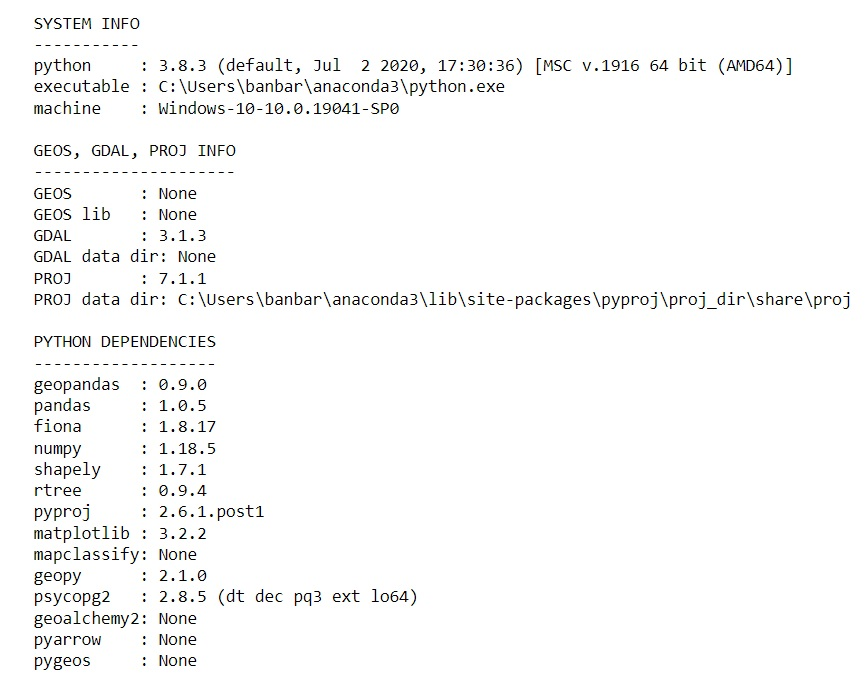

In [2]:
#gpd.show_versions()

# This configuration works
Image(filename='results/geopandas_configuration.jpg') 

In [3]:
# State the paths of input files
path_osm = r".\data_2180\OSM_buildings.geojson"
path_mask = r".\data_2180\mask_buildings.geojson"
path_poi = r".\data_2180\selected_poi.geojson"
# Define: path_self

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [4]:
# Read the buildings & POI data
osm_buildings = gpd.read_file(path_osm)
mask_buildings = gpd.read_file(path_mask)
poi = gpd.read_file(path_poi)
# Define: self_buildings

# YOUR CODE HERE
raise NotImplementedError()


NotImplementedError: 

In [5]:
def obtain_location_poi(poi, poi_id):
    '''
    This function returns the coordinates of a given poi_id. 
    It searches the poi_id under a provided list of poi Geodata series.
    If the given poi_id is found, then it returns the geometry of the point, otherwise it returns -1.
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    
    

In [6]:
# Check whether the check_location_poi works correctly 
assert obtain_location_poi(poi, 3).x == 444317.88872473064
assert obtain_location_poi(poi, 3).y == 588535.4382380601
assert obtain_location_poi(poi, 5) == -1

NotImplementedError: 

In [ ]:
# Find the polygon that contains a POI
def find_polygon(polygons, poi):
    '''
    Given a poi, a point object, returns the polygon among a list of polygons'''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# POI 3 is in which polygon of:
px = obtain_location_poi(poi, 3)
  # OSM:
assert find_polygon(osm_buildings, px)["full_id"] == 'w158000109'
  # Mask:
assert find_polygon(mask_buildings, px)["fid"] == 1148

# Define a point that is not within an OSM building.
px = Point([444440, 588903])
assert find_polygon(osm_buildings, px) == -1



In [ ]:
from shapely.geometry import LineString
def my_hausdorff_distance(p1, p2, name):
    '''
    Implement this function to not only return the Hausdorff distance but also the vertices that led to the computation
    of the Hausdorff distance. 
    
    SAVE THE RESULTING LINE under the <results/> folder with the provided name (third argument).
    
    Investigate the x2polygons source code to obtain the necessary code.
    
    The Hausdorff distance is computed from p1 to p2. There is no keyword argument to this function.
     
    '''
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Store the OSM IDs and Mask IDs that contains a POI
osm_ids = []
mask_ids = []

for index, row in poi.iterrows():
    id_poi = row["id"]
    px = obtain_location_poi(poi, id_poi)
    osm_ids.append(find_polygon(osm_buildings, px)["full_id"])
    mask_ids.append(find_polygon(mask_buildings, px)["fid"])
    

In [ ]:
from scipy.spatial.distance import directed_hausdorff
import numpy as np

def hausdorff_distance_analysis(source_1, pk_1, source_2, pk_2, source_1_ids, source_2_ids):
    '''
    The Hausdorff distance is to be computed from source 1 to source 2. 
    
    Example run - distance computation from OSM to Mask:
    hausdorff_distance_analysis(osm_buildings, "full_id", mask_buildings, "fid", osm_ids, mask_ids)
    
    
    Do NOT use iterrows() function.
    '''
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
hausdorff_distance_analysis(osm_buildings, "full_id", mask_buildings, "fid", osm_ids, mask_ids)

In [ ]:
# The output of hausdorff_distance_anaylsis() function should look like: 
Image(filename='results/hausdorff_distance_analysis.jpg') 

In [ ]:
# Investigate the results from Mask to OSM
hausdorff_distance_analysis(mask_buildings, "fid", osm_buildings, "full_id", mask_ids, osm_ids)

In [ ]:
# OSM -> Mask 
path_result = r".\results\w192300694_901.0.geojson"
r1 = gpd.read_file(path_result)

# Mask -> OSM
path_result = r".\results\918.0_w136550327.geojson"
r2 = gpd.read_file(path_result)

In [ ]:
assert r1['geometry'].length[0] == 6.7741484151836
assert r2['geometry'].length[0] == 10.23620121229196

## Part 2 - Open Question

What is the design limitation of the hausdorff_distance() function as implemented in x2polygons? The better design will end in faster run-time.

# YOUR CODE HERE
raise NotImplementedError()